<a href="https://colab.research.google.com/github/RevTK/DataSciencePractice/blob/main/TodayCode/%EC%BD%94%EB%A1%9C%EB%82%98%EC%A0%84%ED%9B%84_%ED%95%AD%EA%B3%B5%EC%88%98%EC%9A%94/KOSIS_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코로나 전후 🛩 항공사별 항공수요 회복했을까?! 📈 저가 항공사 여객, 편, 화물 수요 ChatGPT 와 함께 국가통계포털 KOSIS 데이터 분석하기

- https://www.youtube.com/watch?v=bCCWwmaSJ0E&list=PLaTc2c6yEwmqrXsGvpB3vK_nAzPEzr-ib

- 한국공항공사, 인천국제공항공사,「항공통계」, 2005.01, 2024.03.13, 항공사별 통계

- https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2

In [18]:
!pip install koreanize-matplotlib

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 윈도우 한글 인코딩, 시점-> object
df_comp = pd.read_csv("kosis_airline_company.csv",
                      encoding='CP949', dtype={"시점":object })
# 날짜 형식으로 변환
df_comp["시점"] = pd.to_datetime(df_comp["시점"])
# 컬럼명 편하게 변경
df_comp.columns = ['시점', '항공사',
                   '도착출발', '운항_편',
                   '여객_명', '화물_톤']

print(df_comp.info())
df_comp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      3816 non-null   datetime64[ns]
 1   항공사     3816 non-null   object        
 2   도착출발    3816 non-null   object        
 3   운항_편    3816 non-null   int64         
 4   여객_명    3816 non-null   int64         
 5   화물_톤    3816 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 179.0+ KB
None


,시점,항공사,도착출발,운항_편,여객_명,화물_톤
0,2005-01-01,아시아나항공,도착,6613,791439,28012
1,2005-01-01,아시아나항공,출발,6610,799835,29576
2,2005-01-01,대한항공,도착,8869,1372897,70544
3,2005-01-01,대한항공,출발,8870,1405847,78329
4,2005-01-01,외항사,도착,3145,443386,28311
...,...,...,...,...,...,...
3811,2024-01-01,에어로케이항공,출발,368,59744,416
3812,2024-01-01,에어프레미아,도착,123,32236,1109
3813,2024-01-01,에어프레미아,출발,122,36071,1557
3814,2024-01-01,외항사,도착,7336,1061718,50335


In [113]:
df_comp["연도"] = df_comp["시점"].dt.year
df_comp["월"] = df_comp["시점"].dt.month
print(df_comp.info())
df_comp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      3816 non-null   datetime64[ns]
 1   항공사     3816 non-null   object        
 2   도착출발    3816 non-null   object        
 3   운항_편    3816 non-null   int64         
 4   여객_명    3816 non-null   int64         
 5   화물_톤    3816 non-null   int64         
 6   연도      3816 non-null   int64         
 7   월       3816 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 238.6+ KB
None


,시점,항공사,도착출발,운항_편,여객_명,화물_톤,연도,월
0,2005-01-01,아시아나항공,도착,6613,791439,28012,2005,1
1,2005-01-01,아시아나항공,출발,6610,799835,29576,2005,1
2,2005-01-01,대한항공,도착,8869,1372897,70544,2005,1
3,2005-01-01,대한항공,출발,8870,1405847,78329,2005,1
4,2005-01-01,외항사,도착,3145,443386,28311,2005,1
...,...,...,...,...,...,...,...,...
3811,2024-01-01,에어로케이항공,출발,368,59744,416,2024,1
3812,2024-01-01,에어프레미아,도착,123,32236,1109,2024,1
3813,2024-01-01,에어프레미아,출발,122,36071,1557,2024,1
3814,2024-01-01,외항사,도착,7336,1061718,50335,2024,1


In [100]:
# 데이터의 개수(통계치가 아님에 주의)
pd.crosstab(df_comp["연도"], df_comp["월"])

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2005,6,6,6,6,6,6,6,6,6,6,6,6
2006,6,6,6,6,6,8,8,8,8,8,8,8
2007,8,8,8,8,8,8,8,8,8,8,8,8
2008,8,8,8,8,8,8,10,10,10,12,12,12
2009,14,14,14,14,14,14,14,14,14,14,14,14
2010,14,14,14,14,14,14,14,14,16,16,16,16
2011,16,16,16,16,16,16,16,16,16,16,16,16
2012,16,16,16,16,16,16,16,16,16,16,16,16
2013,16,16,18,18,18,18,18,18,18,18,18,18


In [165]:
# 연도별 항공사별 여객수(도착)
year_comp_arrival = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp[df_comp["도착출발"] == "도착"]["여객_명"],
            aggfunc="sum").fillna(0)

year_comp_arrival.style.background_gradient(axis=None).format("{:,.0f}")
# axis=0으로 하면 항공사별로 어느 년도의 여객수가 많냐에 따라 색이 진해지는데
# axis=1로 하면 년도 별로 어느 항공사의 여객수가 많냐에 따라 색이 진해진다
# axis=None으로 하면 전체에서 여객수에 따라 색이 진해짐
# :는 3자리마다 콤마, .0f는 소수점 첫자리부터 없앤다.
# background_gradient(axis=None, cmap="Greens") -> 색상 변경

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,"17,375,689","9,279,081",0,0,0,0,0,"5,596,521",0,0,0,0,0
2006,"17,517,157","9,657,383",0,0,0,0,0,"6,396,052",0,"254,306",0,0,0
2007,"17,352,885","9,712,144",0,0,0,0,0,"7,715,902",0,"824,754",0,0,0
2008,"16,595,385","9,937,251",0,"102,790",0,0,0,"7,257,677",0,"977,639","164,755",0,0
2009,"15,241,093","9,080,453",0,"1,420,722",0,0,0,"5,719,078","998,160","1,450,187","1,215,672",0,0
2010,"16,597,414","9,772,709",0,"2,066,861",0,0,0,"6,699,614","1,862,196","1,978,932","1,503,766","154,438",0
2011,"15,890,760","9,881,874",0,"2,317,631",0,0,0,"7,254,076","1,683,022","2,683,653","1,548,533","1,499,116",0
2012,"16,247,734","10,287,609",0,"2,478,083",0,0,0,"7,951,814","1,958,206","3,271,436","1,946,473","1,750,424",0
2013,"15,454,486","10,596,836",0,"2,929,207",0,0,0,"8,896,849","2,316,770","3,786,206","2,327,108","2,052,853",0


In [168]:
df_comp["항공사"].unique()

array(['아시아나항공', '대한항공', '외항사', '제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공', '에어프레미아'], dtype=object)

<Axes: title={'center': '저가항공 도착여객수'}, xlabel='연도'>

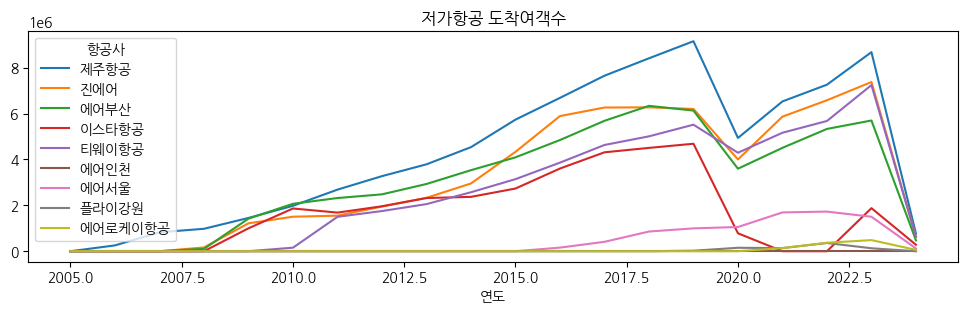

In [183]:
# year_comp_arrival[df_comp["항공사"].unique()].plot()
year_comp_arrival[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12,3), title="저가항공 도착여객수")

array([<Axes: xlabel='연도'>, <Axes: xlabel='연도'>, <Axes: xlabel='연도'>,
       <Axes: xlabel='연도'>, <Axes: xlabel='연도'>, <Axes: xlabel='연도'>,
       <Axes: xlabel='연도'>, <Axes: xlabel='연도'>, <Axes: xlabel='연도'>],
      dtype=object)

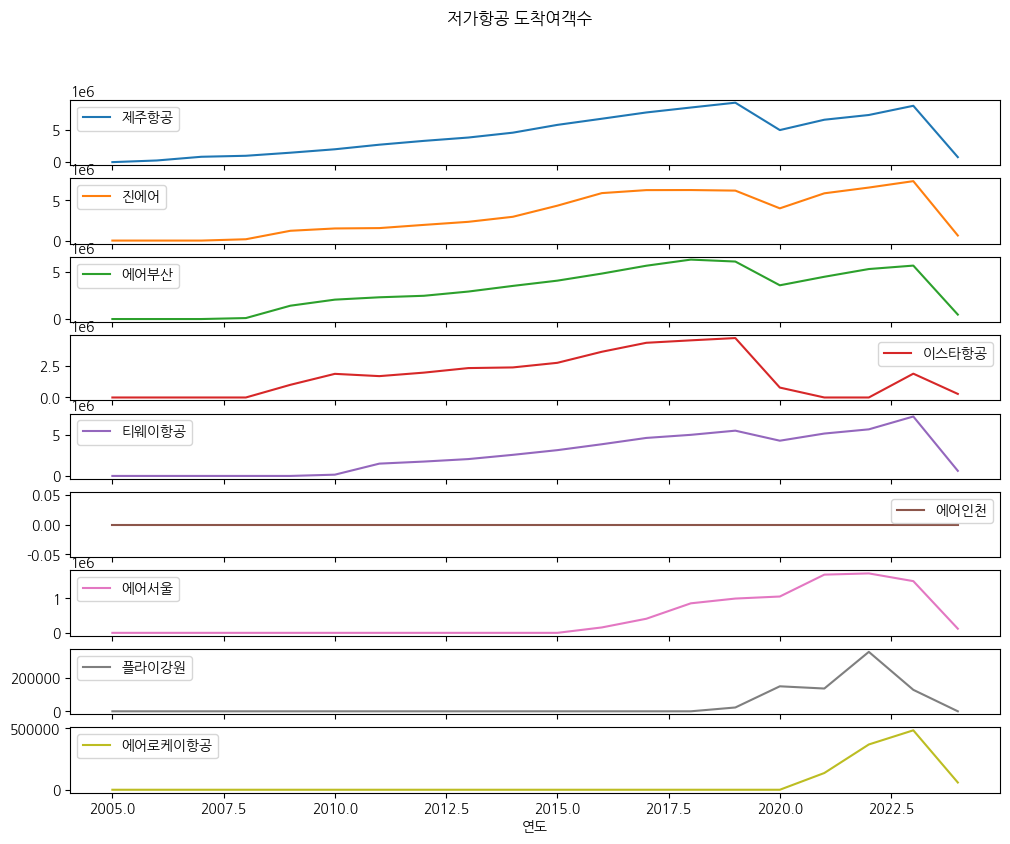

In [187]:
year_comp_arrival[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12,9), title="저가항공 도착여객수", subplots=True)

In [150]:
# 연도별 항공사별 여객수(출발)
year_comp_departure = pd.crosstab(index = df_comp["연도"],
            columns = df_comp["항공사"],
            values=df_comp[df_comp["도착출발"] == "출발"]["여객_명"],
            aggfunc="sum").fillna(0).astype(int)

year_comp_departure.style.background_gradient(axis=1)

# 운항_편이나 화물_톤으로 볼수도 있고, 도착출발 합쳐서 보기도 하고 분석에 따라

항공사,대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
연도,,,,,,,,,,,,,
2005,17345409,9256250,0,0,0,0,0,5722688,0,0,0,0,0
2006,17472856,9627574,0,0,0,0,0,6460045,0,254306,0,0,0
2007,17301779,9640243,0,0,0,0,0,7767162,0,824754,0,0,0
2008,16501056,9849000,0,102790,0,0,0,7321779,0,977816,164755,0,0
2009,15156763,9022825,0,1420722,0,0,0,5860787,998389,1452397,1215873,0,0
2010,16498112,9697732,0,2067851,0,0,0,6795816,1863812,1981593,1505481,154438,0
2011,15754029,9810389,0,2315061,0,0,0,7335955,1683093,2681405,1547733,1500086,0
2012,16165179,10253831,0,2477047,0,0,0,8030555,1960066,3280266,1947313,1748205,0
2013,15382606,10561986,0,2926782,0,0,0,8922610,2322557,3781014,2328306,2053941,0


### 항공사별로 연간 평균 여객 수 계산

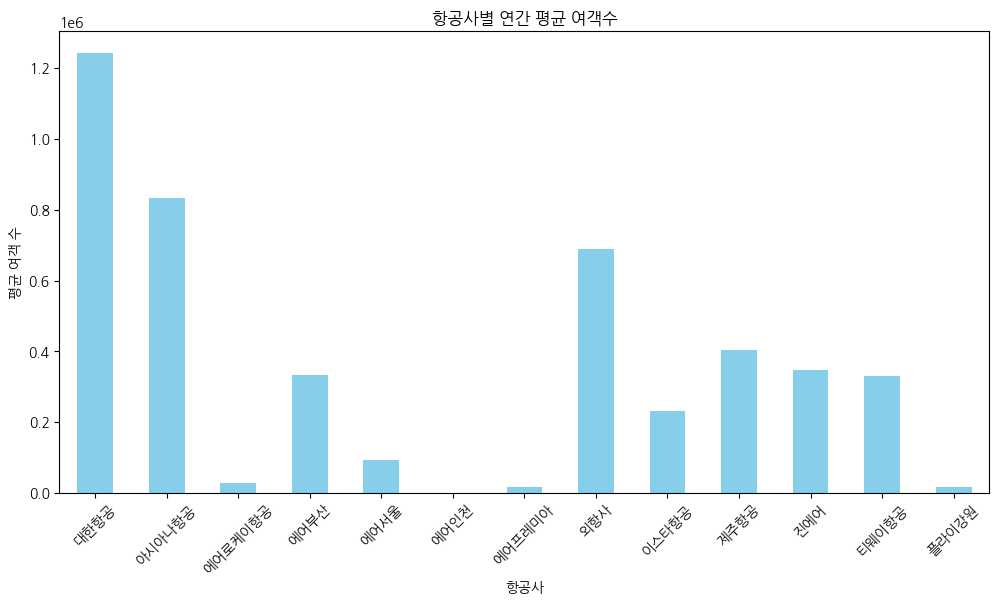

In [109]:
# 항공사별로 연간 평균 여객 수 계산
average_passengers_by_airline = df_comp.groupby("항공사")["여객_명"].mean()
# 그래프로 표시
plt.figure(figsize=(12,6))
average_passengers_by_airline.plot(kind="bar", color="skyblue")
plt.title("항공사별 연간 평균 여객수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()

### 연간 운항 및 여개 증가율 계산
- 연간 운항 편수 및 여객 수의 증가율을 계산하여 항공사별로 비교

In [70]:
# 연간 운항 편수 증가율 계산후 컬럼 추가
df_comp["운항_편_증가율"] = df_comp.groupby("항공사")["운항_편"].pct_change() * 100
# 연간 여객수 증가율 계산후 컬럼 추가
df_comp["여객_명_증가율"] = df_comp.groupby("항공사")["여객_명"].pct_change() * 100
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤,운항_편_증가율,여객_명_증가율
0,2005-01-01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005-01-01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005-01-01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005-01-01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005-01-01,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3811,2024-01-01,에어로케이항공,출발,368,59744,416,0.000000,1.218128
3812,2024-01-01,에어프레미아,도착,123,32236,1109,8.849558,2.326763
3813,2024-01-01,에어프레미아,출발,122,36071,1557,-0.813008,11.896637
3814,2024-01-01,외항사,도착,7336,1061718,50335,2.817099,-0.583920


### 도착/출발별 연간 운항 및 여객 분석
- 도착과 출발별로 연간 운항 편수 및 여객 수를 분석

In [73]:
# 도착별 연간 운항 편수 및 여객 수 분석
arrival_stats = df_comp[df_comp["도착출발"] == "도착"].groupby("시점")[["운항_편", "여객_명"]].sum()
# 출발별 연간 운항 편수 및 여객 수 분석
departure_stats = df_comp[df_comp["도착출발"] == "출발"].groupby("시점")[["운항_편", "여객_명"]].sum()
print(arrival_stats)
print(departure_stats)

             운항_편     여객_명
시점                        
2005-01-01  18627  2607722
2005-02-01  17112  2451062
2005-03-01  18342  2462065
2005-04-01  18735  2823164
2005-05-01  19511  2836185
...           ...      ...
2023-09-01  34219  5515004
2023-10-01  36399  6373056
2023-11-01  34765  5732619
2023-12-01  36311  5936212
2024-01-01  36768  6116806

[229 rows x 2 columns]
             운항_편     여객_명
시점                        
2005-01-01  18633  2670910
2005-02-01  17111  2422116
2005-03-01  18356  2463440
2005-04-01  18732  2829839
2005-05-01  19522  2878604
...           ...      ...
2023-09-01  34275  5685922
2023-10-01  36354  6124691
2023-11-01  34800  5838280
2023-12-01  36328  6011820
2024-01-01  36801  6316887

[229 rows x 2 columns]


<Axes: xlabel='시점'>

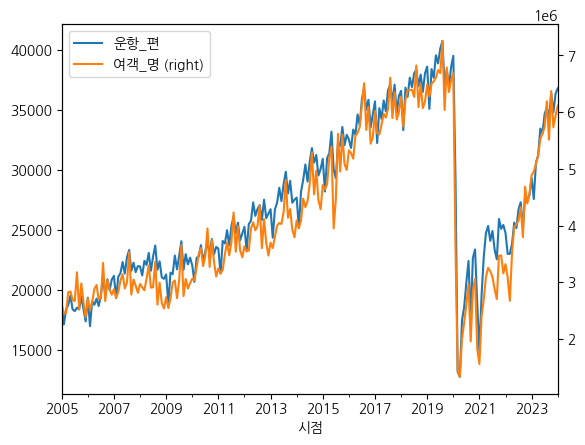

In [74]:
arrival_stats.plot(secondary_y="여객_명")
# 그래프가 비슷하게 나오는 이유는 스케일값이 많이 달라서

### 시간에 따른 화물 운송량 시각화
- 시간에 따른 화물 운송량의 추이를 시각화

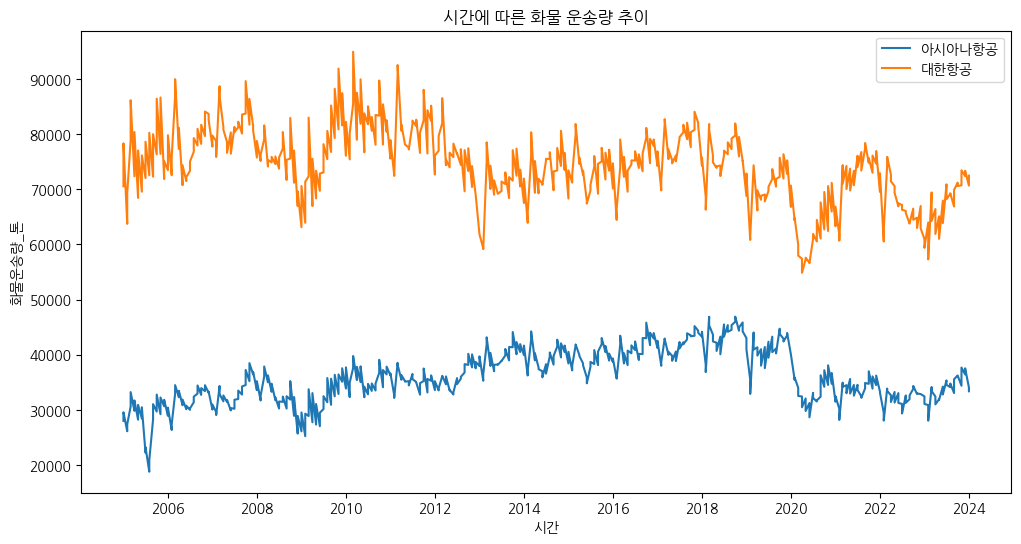

In [76]:
df_comp["시점"] = pd.to_datetime(df_comp["시점"]) # 날짜 형식으로 변환
plt.figure(figsize=(12,6))
plt.plot(df_comp[df_comp["항공사"] == "아시아나항공"]["시점"], df_comp[df_comp["항공사"] == "아시아나항공"]["화물_톤"], label="아시아나항공")
plt.plot(df_comp[df_comp["항공사"] == "대한항공"]["시점"], df_comp[df_comp["항공사"] == "대한항공"]["화물_톤"], label="대한항공")
plt.xlabel("시간")
plt.ylabel("화물운송량_톤")
plt.legend()
plt.title("시간에 따른 화물 운송량 추이")
plt.show()

In [77]:
df_comp

,시점,항공사,도착출발,운항_편,여객_명,화물_톤,운항_편_증가율,여객_명_증가율
0,2005-01-01,아시아나항공,도착,6613,791439,28012,NaN,NaN
1,2005-01-01,아시아나항공,출발,6610,799835,29576,-0.045365,1.060852
2,2005-01-01,대한항공,도착,8869,1372897,70544,NaN,NaN
3,2005-01-01,대한항공,출발,8870,1405847,78329,0.011275,2.400034
4,2005-01-01,외항사,도착,3145,443386,28311,NaN,NaN
...,...,...,...,...,...,...,...,...
3811,2024-01-01,에어로케이항공,출발,368,59744,416,0.000000,1.218128
3812,2024-01-01,에어프레미아,도착,123,32236,1109,8.849558,2.326763
3813,2024-01-01,에어프레미아,출발,122,36071,1557,-0.813008,11.896637
3814,2024-01-01,외항사,도착,7336,1061718,50335,2.817099,-0.583920
